I initially want to see how much of the data contains fraudulant transactions

Number of non-fraudulent transactions = 284315
Number of fraudulent transactions = 492
fraudulent_percentage = 0.17%


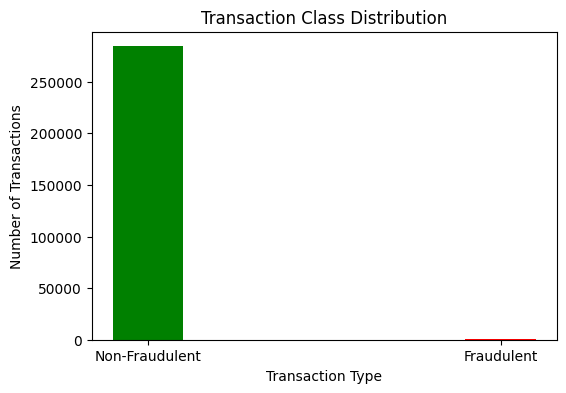

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/creditcard.csv/creditcard.csv')

count_class_0 = (df['Class'] == 0).sum()
count_class_1 = (df['Class'] == 1).sum()
fraudulent_percentage = round((count_class_1/count_class_0 ) * 100, 2)

print(f'Number of non-fraudulent transactions = {count_class_0}')
print(f'Number of fraudulent transactions = {count_class_1}')
print(f'fraudulent_percentage = {fraudulent_percentage}%')



#Now lets visualize this
# Data for the bar chart
labels = ['Non-Fraudulent', 'Fraudulent']
counts = [count_class_0, count_class_1]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'], width=0.2, align='center')
plt.title('Transaction Class Distribution')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

The model only has 0.17% of the data to feed into fraudulent patterns
    - The model sees very few fraud examples, so it doesn’t learn the patterns well.
    - It becomes biased toward the majority class.
    - If we don’t fix this, it may achieve 99.8% accuracy but fail to catch real fraud.


Data Health Check
Are there any missing values?
Are there any duplicate rows?
What are the min, max, mean of the Amount column?

In [103]:
# Check if any values are missing in each row
has_missing = df.isnull().any(axis=1)
duplicates = df.duplicated()
amount_details = df['Amount'].describe()
# Count of missing rows
print(f"Number of rows with missing values: {has_missing.sum()}")

print(f"Number of rows with duplicate values: {duplicates.sum()}")

print(df[duplicates].shape[0])
print(df[duplicates].head(3)) #some of the duplicate values
print(amount_details)


Number of rows with missing values: 0
Number of rows with duplicate values: 1081
1081
     Time        V1        V2        V3        V4        V5        V6  \
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
33   0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
35   0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
113 -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  

[3 rows x 31 columns]
count    284807.000000
me

In [104]:
#dropping duplicate rows (likely error on inputtng this data)
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [105]:
df.shape

(283726, 31)

We notice the min amount is 0 and max is 25691+ which makes the discrepency way to big
We’re going to standardize the Amount column using Z-score scaling so that:
The values will have a mean of 0 and a standard deviation of 1
This helps prevent Amount from overpowering other features in models like logistic regression.

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Amount_scaled'].describe()


count    2.837260e+05
mean    -5.409347e-17
std      1.000002e+00
min     -3.533268e-01
25%     -3.309625e-01
50%     -2.654671e-01
75%     -4.378088e-02
max      1.022476e+02
Name: Amount_scaled, dtype: float64

In [107]:
#Now we want to drop the old Amount column that is not scaled
#df.drop(columns=['Amount'], inplace=True) this line has already been run
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_scaled'],
      dtype='object')

Now We want to Address Class Imbalance

Now we address the fact that:
We have only 492 fraud cases out of ~283K rows.
This imbalance can cause models to ignore the minority class completely.

In [ ]:
df.to_csv("../data/creditcard.csv/cleaned_creditcard.csv", index=False)
#saved cleaned data